# PHASE_5_CAPSTONE_PROJECT

# CNN MODELS

### Data source:

The data source consists of over 44 thousand fashion images from Kaggle.

Source link: https://www.kaggle.com/datasets/paramaggarwal/fashion-product-images-dataset

In [161]:
import pandas as pd
import numpy as np
import csv
import json
import glob
import os
import shutil
import random
import pickle
import h5py
import hdf5storage
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

from keras import layers
from keras.models import Sequential
from keras.layers import Reshape
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import Input
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D 
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Resizing, RandomFlip, RandomRotation
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

### 1. Baseline model

To start, we will employ the ImageDataGenerator object, applying the rescale parameter to normalize all images within the train, validation, and test sets.

Batch size applied is 64. Shuffle will be True for train and validation sets in order for the images to be presented in a random order during each epoch, which helps in improving the model's learning and generalization capabilities.

In [162]:
# Directory path
train_data_dir = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train'
val_data_dir = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation'
test_data_dir = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test'

image_size = (256, 256)
num_classes = 10

image_size = (256, 256)
num_classes = 10

train_datagen_baseline = ImageDataGenerator(rescale=1./255)
 
val_datagen_baseline = ImageDataGenerator(rescale = 1/255)

test_datagen_baseline = ImageDataGenerator(rescale = 1/255)


train_generator_baseline = train_datagen_baseline.flow_from_directory(directory=train_data_dir, target_size = image_size,
                                                   class_mode='categorical',
                                                    batch_size=64,
                                                    shuffle=True,
                                                    classes=[str(i) for i in range(num_classes)])

val_generator_baseline = val_datagen_baseline.flow_from_directory(directory=val_data_dir, target_size = image_size,
                                                   class_mode='categorical',
                                                    batch_size=64,
                                                shuffle=True,
                                                  classes=[str(i) for i in range(num_classes)])

test_generator_baseline = test_datagen_baseline.flow_from_directory(directory=test_data_dir, target_size = image_size,
                                                    class_mode='categorical',
                                                   batch_size=64,
                                                  shuffle=False,
                                                  classes=[str(i) for i in range(num_classes)])


Found 14782 images belonging to 10 classes.
Found 4935 images belonging to 10 classes.
Found 4926 images belonging to 10 classes.


We will first build up a simple CNN model as a baseline. 

This model will contain 7 layers as below:

1. Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3): this is the first convolutional layer with 32 filters and each having a size of 3x3, activation 'relu' which introduces non-linearity to the model, the input_shape specifies the dimension of the input images, which are 256x256 pixels with 3 color channels (RGB).
2. MaxPooling2D(2, 2): 2nd layer and 1st MaxPooling layer, to reduce the spatial dimensions of the output from the previous convolutional layer, helping to reduce the number of parameters and computation in subsequent layers.
3. Conv2D(64, (3, 3), activation='relu'): 2nd convolutional layer with 64 filters with each having a size of 3x3.
4. MaxPooling2D(2, 2): 2nd MaxPooling layer, again to reduce the spatial dimensions.
5. Flatten(): this layer flatten 2D output from the previous layer into 1D vector. This layer is necessary to feed data into the dense (fully connected) layers.
6. Dense(128, activation='relu'): this is a dense (fully connected) layer with 128 neurons and relu activation. It learns high-level representation from the flattened input, which means that it performs the task of learning and capturing important patterns or features that are relevant to the predictions.
7. Dense(10, activation='softmax'): this is the last layer with 10 nerons,one for each class in the classification task. The activation function used here is softmax, which converts the raw scores into probability. It outputs the probability distribution over the 10 classes, including the likelihood of each class being the correct prediction.

In [163]:
cnn_model_baseline = Sequential()
cnn_model_baseline.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_baseline.add(MaxPooling2D(2, 2))
cnn_model_baseline.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model_baseline.add(MaxPooling2D(2, 2))
cnn_model_baseline.add(Flatten())
cnn_model_baseline.add(Dense(128, activation='relu'))
cnn_model_baseline.add(Dense(10, activation='softmax'))

In [164]:
len(cnn_model_baseline.layers)

7

In [165]:
cnn_model_baseline.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [48]:
history_cnn_model_baseline = cnn_model_baseline.fit(train_generator_baseline,
                        steps_per_epoch=len(train_generator_baseline),
                        epochs=50,
                        validation_data=val_generator_baseline,
                        validation_steps=len(val_generator_baseline))

Epoch 1/50
231/231 [==============================] - 201s 868ms/step - loss: 0.9159 - accuracy: 0.8123 - auc: 0.9729 - precision: 0.8635 - recall: 0.7640 - val_loss: 0.2876 - val_accuracy: 0.9031 - val_auc: 0.9944 - val_precision: 0.9190 - val_recall: 0.8780
Epoch 2/50
231/231 [==============================] - 197s 851ms/step - loss: 0.1795 - accuracy: 0.9414 - auc: 0.9971 - precision: 0.9475 - recall: 0.9311 - val_loss: 0.2159 - val_accuracy: 0.9313 - val_auc: 0.9954 - val_precision: 0.9380 - val_recall: 0.9220
Epoch 3/50
231/231 [==============================] - 196s 850ms/step - loss: 0.1114 - accuracy: 0.9618 - auc: 0.9985 - precision: 0.9650 - recall: 0.9561 - val_loss: 0.2363 - val_accuracy: 0.9341 - val_auc: 0.9946 - val_precision: 0.9399 - val_recall: 0.9260
Epoch 4/50
231/231 [==============================] - 197s 852ms/step - loss: 0.0713 - accuracy: 0.9747 - auc: 0.9995 - precision: 0.9765 - recall: 0.9709 - val_loss: 0.2582 - val_accuracy: 0.9309 - val_auc: 0.9915 - val

#### Save the model

Here are the saved model and training history. We have commented out the code to avoid duplicate saves.

In [56]:
# cnn_model_baseline.save('cnn_baseline_model_50epoch.h5')

In [50]:
# hdf5storage.savemat("history_cnn_model_baseline_50epoch.h5", history_cnn_model_baseline.history)

#### Evaluate the model

Load the model out.

In [166]:
cnn_model_baseline_loaded = load_model('cnn_baseline_model_50epoch.h5')

In [12]:
cnn_model_baseline_loaded.evaluate(train_generator_baseline)

231/231 [==============================] - 52s 225ms/step - loss: 4.3856e-06 - accuracy: 1.0000 - auc: 1.0000 - precision: 1.0000 - recall: 1.0000


[4.385628926684149e-06, 1.0, 1.0, 1.0, 1.0]

In [13]:
cnn_model_baseline_loaded.evaluate(val_generator_baseline)

78/78 [==============================] - 17s 223ms/step - loss: 0.7005 - accuracy: 0.9331 - auc: 0.9784 - precision: 0.9333 - recall: 0.9329


[0.7004615664482117,
 0.93313068151474,
 0.9783970713615417,
 0.9333062767982483,
 0.9329280853271484]

In [14]:
cnn_model_baseline_loaded.evaluate(test_generator_baseline)

77/77 [==============================] - 17s 221ms/step - loss: 0.7448 - accuracy: 0.9255 - auc: 0.9756 - precision: 0.9262 - recall: 0.9251


[0.7448127865791321,
 0.9254973530769348,
 0.975583553314209,
 0.9262195229530334,
 0.9250913262367249]

Load the history out.

In [167]:
history_cnn_model_baseline_loaded = hdf5storage.loadmat("history_cnn_model_baseline_50epoch.h5")

In [168]:
print(history_cnn_model_baseline_loaded.keys())

dict_keys(['accuracy', 'auc', 'loss', 'precision', 'recall', 'val_accuracy', 'val_auc', 'val_loss', 'val_precision', 'val_recall'])


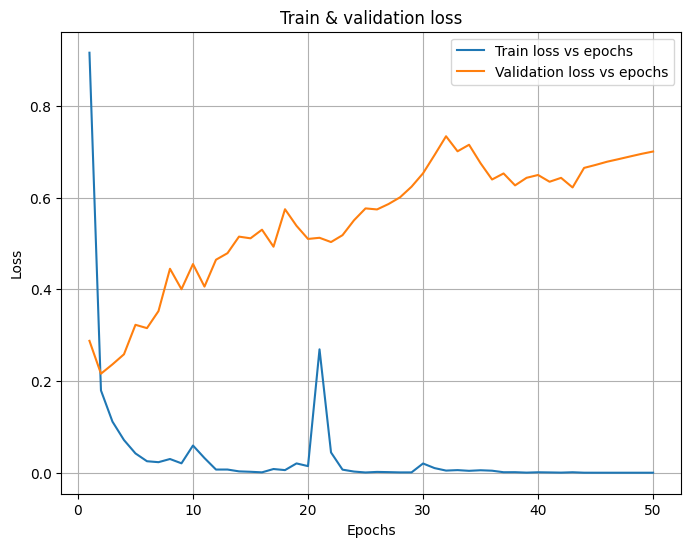

In [169]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_baseline_loss_values = history_cnn_model_baseline_loaded['loss']
cnn_baseline_val_loss_values = history_cnn_model_baseline_loaded['val_loss']


epochs = range(1,len(cnn_baseline_loss_values)+1)

ax.plot(epochs,cnn_baseline_loss_values,label='Train loss vs epochs')
ax.plot(epochs,cnn_baseline_val_loss_values,label='Validation loss vs epochs')

ax.set_title('Train & validation loss')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Loss');

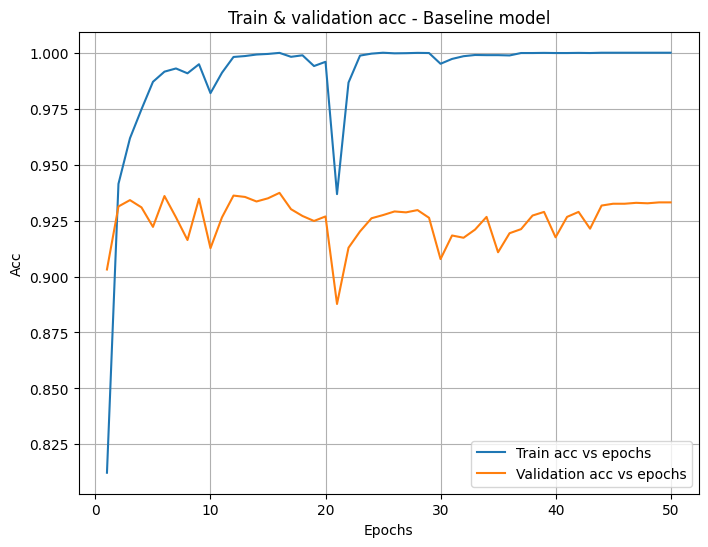

In [170]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_baseline_acc_values = history_cnn_model_baseline_loaded['accuracy']
cnn_baseline_val_acc_values = history_cnn_model_baseline_loaded['val_accuracy']


epochs = range(1,len(cnn_baseline_acc_values)+1)

ax.plot(epochs,cnn_baseline_acc_values,label='Train acc vs epochs')
ax.plot(epochs,cnn_baseline_val_acc_values,label='Validation acc vs epochs')

ax.set_title('Train & validation acc - Baseline model')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Acc');

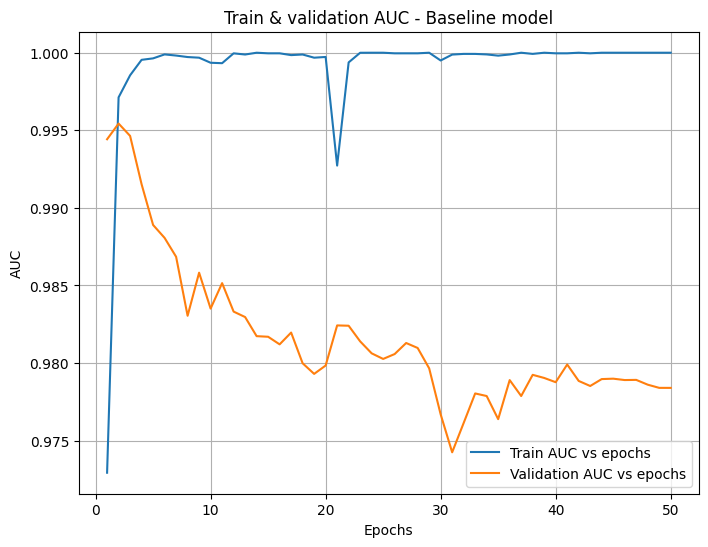

In [171]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_baseline_AUC_values = history_cnn_model_baseline_loaded['auc']
cnn_baseline_val_AUC_values = history_cnn_model_baseline_loaded['val_auc']


epochs = range(1,len(cnn_baseline_AUC_values)+1)

ax.plot(epochs,cnn_baseline_AUC_values,label='Train AUC vs epochs')
ax.plot(epochs,cnn_baseline_val_AUC_values,label='Validation AUC vs epochs')

ax.set_title('Train & validation AUC - Baseline model')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('AUC');

In [172]:
cnn_baseline_test_class_pred = cnn_model_baseline_loaded.predict(test_generator_baseline,steps=len(test_generator_baseline))

77/77 [==============================] - 27s 351ms/step


In [173]:
cnn_baseline_predicted_classes = np.argmax(cnn_baseline_test_class_pred, axis=-1)
cnn_baseline_predicted_classes

array([0, 0, 0, ..., 9, 3, 0])

In [174]:
test_true_classes = test_generator_baseline.classes
test_true_classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [175]:
test_class_labels = list(test_generator_baseline.class_indices.keys()) 
test_class_labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [176]:
test_class_labels_mapping = {0: 'Tshirts', 1: 'Shirts', 2: 'casual_shoes',3: 'watches' , 4: 'sports_shoes', 5: 'kurtas',6:'handbags',7:'heels',8:'sunglasses',9:'wallets'}
test_class_labels_words = list(test_class_labels_mapping.values())
test_class_labels_words 

['Tshirts',
 'Shirts',
 'casual_shoes',
 'watches',
 'sports_shoes',
 'kurtas',
 'handbags',
 'heels',
 'sunglasses',
 'wallets']

In [177]:
cnn_baseline_cm_digits = confusion_matrix(test_true_classes, cnn_baseline_predicted_classes)
cnn_baseline_cm_digits

array([[1366,   28,    3,    2,    4,    9,    2,    0,    0,    0],
       [  54,  585,    0,    1,    0,    3,    0,    0,    0,    0],
       [   2,    0,  471,    0,   84,    0,    0,   12,    0,    0],
       [   2,    1,    1,  502,    0,    0,    2,    0,    0,    0],
       [   0,    0,   90,    1,  313,    0,    1,    0,    0,    2],
       [  12,    7,    0,    0,    0,  350,    0,    0,    0,    0],
       [   2,    0,    1,    4,    0,    1,  340,    0,    1,    3],
       [   0,    0,    7,    2,    2,    0,    2,  251,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  212,    1],
       [   2,    0,    0,    1,    0,    0,   15,    0,    0,  169]])

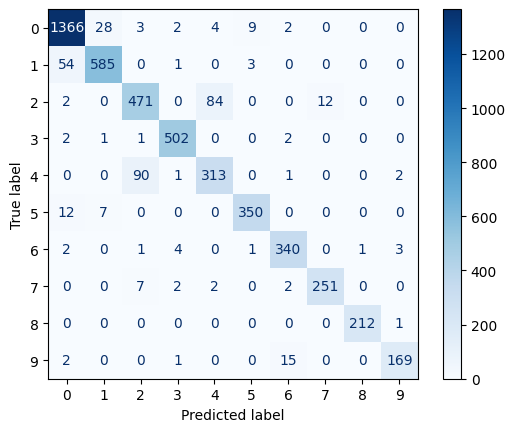

In [178]:
cnn_baseline_disp = ConfusionMatrixDisplay(
    confusion_matrix=cnn_baseline_cm_digits)

cnn_baseline_disp.plot(cmap=plt.cm.Blues)
plt.show()

In [179]:
cnn_baseline_report = classification_report(test_true_classes, cnn_baseline_predicted_classes, target_names=test_class_labels_words,)
print(cnn_baseline_report)

              precision    recall  f1-score   support

     Tshirts       0.95      0.97      0.96      1414
      Shirts       0.94      0.91      0.93       643
casual_shoes       0.82      0.83      0.82       569
     watches       0.98      0.99      0.98       508
sports_shoes       0.78      0.77      0.77       407
      kurtas       0.96      0.95      0.96       369
    handbags       0.94      0.97      0.95       352
       heels       0.95      0.95      0.95       264
  sunglasses       1.00      1.00      1.00       213
     wallets       0.97      0.90      0.93       187

    accuracy                           0.93      4926
   macro avg       0.93      0.92      0.93      4926
weighted avg       0.93      0.93      0.93      4926



In [180]:
cnn_baseline_report_output = classification_report(test_true_classes, cnn_baseline_predicted_classes, target_names=test_class_labels_words,output_dict=True)
print(cnn_baseline_report_output)

{'Tshirts': {'precision': 0.9486111111111111, 'recall': 0.9660537482319661, 'f1-score': 0.9572529782761037, 'support': 1414}, 'Shirts': {'precision': 0.9420289855072463, 'recall': 0.9097978227060654, 'f1-score': 0.925632911392405, 'support': 643}, 'casual_shoes': {'precision': 0.8219895287958116, 'recall': 0.827768014059754, 'f1-score': 0.8248686514886164, 'support': 569}, 'watches': {'precision': 0.9785575048732943, 'recall': 0.9881889763779528, 'f1-score': 0.9833496571988247, 'support': 508}, 'sports_shoes': {'precision': 0.7766749379652605, 'recall': 0.769041769041769, 'f1-score': 0.7728395061728396, 'support': 407}, 'kurtas': {'precision': 0.9641873278236914, 'recall': 0.948509485094851, 'f1-score': 0.9562841530054644, 'support': 369}, 'handbags': {'precision': 0.9392265193370166, 'recall': 0.9659090909090909, 'f1-score': 0.9523809523809524, 'support': 352}, 'heels': {'precision': 0.9543726235741445, 'recall': 0.9507575757575758, 'f1-score': 0.9525616698292222, 'support': 264}, 'su

In [181]:
cnn_baseline_f1_scores = {class_name: cnn_baseline_report_output[class_name]['f1-score'] for class_name in test_class_labels_words}
cnn_baseline_f1_scores_rounded = {class_name: round(score, 3) for class_name, score in cnn_baseline_f1_scores.items()}
cnn_baseline_f1_scores_rounded

{'Tshirts': 0.957,
 'Shirts': 0.926,
 'casual_shoes': 0.825,
 'watches': 0.983,
 'sports_shoes': 0.773,
 'kurtas': 0.956,
 'handbags': 0.952,
 'heels': 0.953,
 'sunglasses': 0.995,
 'wallets': 0.934}

In [182]:
cnn_baseline_model_precision = cnn_baseline_report_output['weighted avg']['precision']
cnn_baseline_model_precision

0.9254816292590945

In [183]:
cnn_baseline_model_recall = cnn_baseline_report_output['weighted avg']['recall']
cnn_baseline_model_recall

0.9254973609419407

In [184]:
cnn_baseline_model_f1score = cnn_baseline_report_output['weighted avg']['f1-score']
cnn_baseline_model_f1score

0.9253675759948996

In [185]:
cnn_baseline_model_accuracy = accuracy_score(test_true_classes, cnn_baseline_predicted_classes)
cnn_baseline_model_accuracy

0.9254973609419407

In [186]:
test_true_classes_onehot = tf.keras.utils.to_categorical(test_true_classes, num_classes=num_classes)
cnn_baseline_model_mean_auc = roc_auc_score(test_true_classes_onehot, cnn_baseline_test_class_pred, multi_class='ovr', average='macro')
cnn_baseline_model_mean_auc

0.9941740957364649

In [187]:
#Create a summary table
table_columns = ['Model Name','Accuracy_All','AUC_All','Precision_All','Recall_All','F1_score_All'] + list(cnn_baseline_f1_scores_rounded.keys())
sumary_table = pd.DataFrame(columns=table_columns)
sumary_table

,Model Name,Accuracy_All,AUC_All,Precision_All,Recall_All,F1_score_All,Tshirts,Shirts,casual_shoes,watches,sports_shoes,kurtas,handbags,heels,sunglasses,wallets


In [188]:
sumary_table.loc[0] = ['cnn_baseline_model',round(cnn_baseline_model_accuracy,3),round(cnn_baseline_model_mean_auc,3),round(cnn_baseline_model_precision,3),round(cnn_baseline_model_recall,2) ,round(cnn_baseline_model_f1score,2)] + list(cnn_baseline_f1_scores_rounded.values())
sumary_table

,Model Name,Accuracy_All,AUC_All,Precision_All,Recall_All,F1_score_All,Tshirts,Shirts,casual_shoes,watches,sports_shoes,kurtas,handbags,heels,sunglasses,wallets
0,cnn_baseline_model,0.925,0.994,0.925,0.93,0.93,0.957,0.926,0.825,0.983,0.773,0.956,0.952,0.953,0.995,0.934


Overall, the test accuracy is approximately 93%, indicating that this model performs well. However, a closer look at the train accuracy reveals a continuous increase with each epoch, while the validation accuracy initially rises but then plateaus at around 93%. This behavior suggests that the model is overfitting and struggles to generalize to unseen data.

The AUC metric demonstrates an initial increase but subsequently drops down and fluctuates. Similarly, the loss function initially decreases but eventually starts to increase. These trends further support the notion of overfitting, where the model initially learns from the training data but later tends to memorize noise and specific patterns, leading to decreased performance on the validation data.

Among the 10 product types, most achieve excellent f1-scores of over 90%. However, casual shoes and sports shoes exhibit f1-scores above or below 80%, highlighting the challenge of training these two product types due to their visual similarity.

### 2nd CNN model

Adding 4 layers to increase the model complexity.

In [189]:
cnn_model_bl3 = Sequential()
cnn_model_bl3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model_bl3.add(layers.MaxPooling2D(2, 2))
cnn_model_bl3.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model_bl3.add(layers.MaxPooling2D(2, 2))
cnn_model_bl3.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model_bl3.add(layers.MaxPooling2D(2, 2))
cnn_model_bl3.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_model_bl3.add(layers.MaxPooling2D(2, 2))
cnn_model_bl3.add(layers.Flatten())
cnn_model_bl3.add(layers.Dense(128, activation='relu'))
cnn_model_bl3.add(layers.Dense(10, activation='softmax'))

In [190]:
len(cnn_model_bl3.layers)

11

In [191]:
cnn_model_bl3.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [159]:
history_cnn_model_bl3 = cnn_model_bl3.fit(train_generator_baseline,
                        steps_per_epoch=len(train_generator_baseline),
                        epochs=50,
                        validation_data=val_generator_baseline,
                        validation_steps=len(val_generator_baseline))

Epoch 1/50
231/231 [==============================] - 339s 1s/step - loss: 0.5590 - accuracy: 0.8016 - auc: 0.9809 - precision: 0.8664 - recall: 0.7562 - val_loss: 0.2909 - val_accuracy: 0.8932 - val_auc: 0.9937 - val_precision: 0.9038 - val_recall: 0.8857
Epoch 2/50
231/231 [==============================] - 343s 1s/step - loss: 0.2148 - accuracy: 0.9230 - auc: 0.9960 - precision: 0.9302 - recall: 0.9155 - val_loss: 0.1823 - val_accuracy: 0.9422 - val_auc: 0.9968 - val_precision: 0.9469 - val_recall: 0.9386
Epoch 3/50
231/231 [==============================] - 332s 1s/step - loss: 0.1517 - accuracy: 0.9461 - auc: 0.9978 - precision: 0.9498 - recall: 0.9413 - val_loss: 0.1818 - val_accuracy: 0.9378 - val_auc: 0.9967 - val_precision: 0.9430 - val_recall: 0.9321
Epoch 4/50
231/231 [==============================] - 2481s 11s/step - loss: 0.1148 - accuracy: 0.9579 - auc: 0.9986 - precision: 0.9600 - recall: 0.9558 - val_loss: 0.1762 - val_accuracy: 0.9433 - val_auc: 0.9966 - val_precision

Epoch 33/50
231/231 [==============================] - 333s 1s/step - loss: 1.3536e-04 - accuracy: 0.9999 - auc: 1.0000 - precision: 0.9999 - recall: 0.9999 - val_loss: 0.4127 - val_accuracy: 0.9576 - val_auc: 0.9865 - val_precision: 0.9578 - val_recall: 0.9576
Epoch 34/50
231/231 [==============================] - 337s 1s/step - loss: 2.5711e-05 - accuracy: 1.0000 - auc: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4224 - val_accuracy: 0.9591 - val_auc: 0.9862 - val_precision: 0.9593 - val_recall: 0.9591
Epoch 35/50
231/231 [==============================] - 331s 1s/step - loss: 1.7407e-05 - accuracy: 1.0000 - auc: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4308 - val_accuracy: 0.9589 - val_auc: 0.9861 - val_precision: 0.9589 - val_recall: 0.9589
Epoch 36/50
231/231 [==============================] - 333s 1s/step - loss: 1.3605e-05 - accuracy: 1.0000 - auc: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4376 - val_accuracy: 0.9587 - val_auc: 0.98

#### Save the model

In [75]:
# cnn_model_bl3.save('cnn_b13_model_50epoch.h5')

In [74]:
# hdf5storage.savemat("history_cnn_model_bl3_50epoch.h5", history_cnn_model_bl3.history)

#### Evaluate the model

Load the model out.

In [192]:
cnn_model_bl3_loaded = load_model('cnn_b13_model_50epoch.h5')

In [42]:
cnn_model_bl3_loaded.evaluate(train_generator_baseline)

231/231 [==============================] - 160s 694ms/step - loss: 1.2425e-04 - accuracy: 0.9999 - auc: 1.0000 - precision: 0.9999 - recall: 0.9999


[0.00012425014574546367,
 0.9999323487281799,
 1.0,
 0.9999323487281799,
 0.9999323487281799]

In [43]:
cnn_model_bl3_loaded.evaluate(val_generator_baseline)

78/78 [==============================] - 62s 796ms/step - loss: 0.5318 - accuracy: 0.9499 - auc: 0.9834 - precision: 0.9505 - recall: 0.9497


[0.5318280458450317,
 0.949949324131012,
 0.9833815693855286,
 0.9505171179771423,
 0.9497467279434204]

In [44]:
cnn_model_bl3_loaded.evaluate(test_generator_baseline)

77/77 [==============================] - 63s 822ms/step - loss: 0.5236 - accuracy: 0.9466 - auc: 0.9819 - precision: 0.9478 - recall: 0.9464


[0.5235958099365234,
 0.9466098546981812,
 0.9818697571754456,
 0.9477536082267761,
 0.9464068412780762]

Load the history out.

In [193]:
history_cnn_model_bl3_loaded = hdf5storage.loadmat("history_cnn_model_bl3_50epoch.h5")

In [194]:
print(history_cnn_model_bl3_loaded.keys())

dict_keys(['accuracy', 'auc', 'loss', 'precision', 'recall', 'val_accuracy', 'val_auc', 'val_loss', 'val_precision', 'val_recall'])


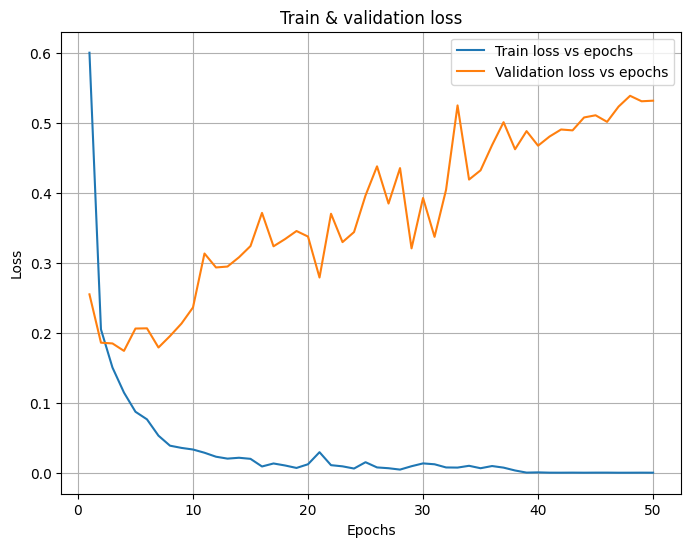

In [195]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_bl3_loss_values = history_cnn_model_bl3_loaded['loss']
cnn_bl3_val_loss_values = history_cnn_model_bl3_loaded['val_loss']


epochs = range(1,len(cnn_bl3_loss_values)+1)

ax.plot(epochs,cnn_bl3_loss_values,label='Train loss vs epochs')
ax.plot(epochs,cnn_bl3_val_loss_values,label='Validation loss vs epochs')

ax.set_title('Train & validation loss')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Loss');

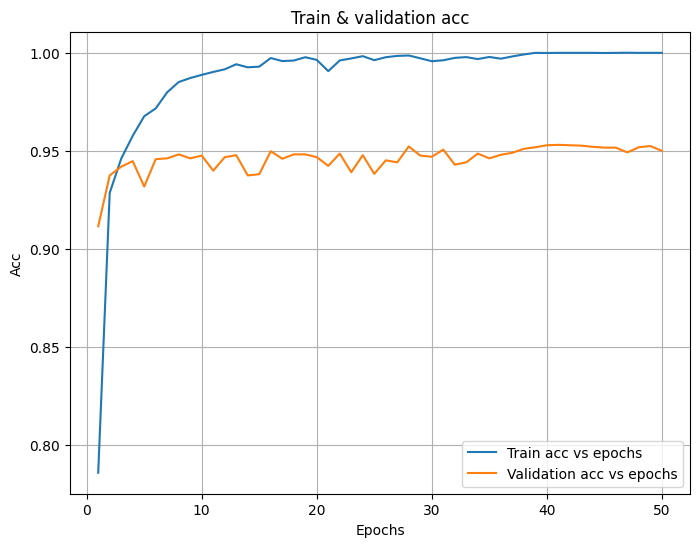

In [48]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_bl3_acc_values = history_cnn_model_bl3_loaded['accuracy']
cnn_bl3_val_acc_values = history_cnn_model_bl3_loaded['val_accuracy']


epochs = range(1,len(cnn_bl3_acc_values)+1)

ax.plot(epochs,cnn_bl3_acc_values,label='Train acc vs epochs')
ax.plot(epochs,cnn_bl3_val_acc_values,label='Validation acc vs epochs')

ax.set_title('Train & validation acc')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Acc');

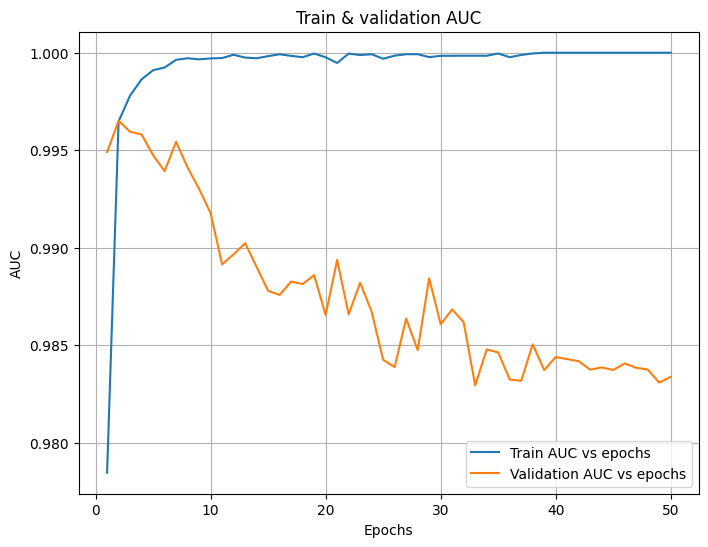

In [49]:
fig,ax=plt.subplots(figsize=(8,6))

cnn_bl3_AUC_values = history_cnn_model_bl3_loaded['auc']
cnn_bl3_val_AUC_values = history_cnn_model_bl3_loaded['val_auc']


epochs = range(1,len(cnn_bl3_AUC_values)+1)

ax.plot(epochs,cnn_bl3_AUC_values,label='Train AUC vs epochs')
ax.plot(epochs,cnn_bl3_val_AUC_values,label='Validation AUC vs epochs')

ax.set_title('Train & validation AUC')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('AUC');

In [50]:
cnn_bl3_test_class_pred = cnn_model_bl3_loaded.predict(test_generator_baseline,steps=len(test_generator_baseline))

77/77 [==============================] - 62s 810ms/step


In [196]:
cnn_bl3_predicted_classes = np.argmax(cnn_bl3_test_class_pred, axis=-1)
cnn_bl3_predicted_classes

array([0, 0, 0, ..., 9, 3, 0])

In [197]:
test_true_classes = test_generator_baseline.classes
test_true_classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [198]:
test_class_labels = list(test_generator_baseline.class_indices.keys()) 
test_class_labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [199]:
test_class_labels_mapping = {0: 'Tshirts', 1: 'Shirts', 2: 'casual_shoes',3: 'watches' , 4: 'sports_shoes', 5: 'kurtas',6:'handbags',7:'heels',8:'sunglasses',9:'wallets'}
test_class_labels_words = list(test_class_labels_mapping.values())
test_class_labels_words

['Tshirts',
 'Shirts',
 'casual_shoes',
 'watches',
 'sports_shoes',
 'kurtas',
 'handbags',
 'heels',
 'sunglasses',
 'wallets']

In [200]:
cnn_bl3_cm_digits = confusion_matrix(test_true_classes, cnn_bl3_predicted_classes)
cnn_bl3_cm_digits

array([[1392,   13,    0,    3,    0,    3,    2,    1,    0,    0],
       [  26,  613,    0,    0,    0,    2,    2,    0,    0,    0],
       [   1,    1,  475,    0,   82,    0,    1,    9,    0,    0],
       [   0,    1,    0,  505,    1,    0,    0,    0,    0,    1],
       [   0,    0,   69,    0,  334,    0,    2,    2,    0,    0],
       [   9,    3,    0,    0,    0,  357,    0,    0,    0,    0],
       [   1,    0,    0,    2,    1,    0,  341,    0,    1,    6],
       [   0,    0,    6,    1,    1,    0,    1,  255,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0,  212,    0],
       [   2,    0,    0,    1,    0,    0,    5,    0,    0,  179]])

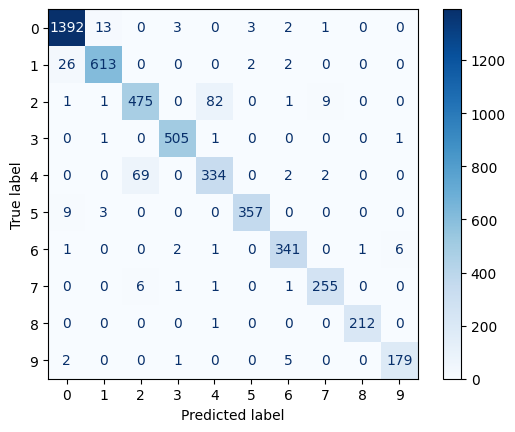

In [201]:
cnn_bl3_disp = ConfusionMatrixDisplay(
    confusion_matrix=cnn_bl3_cm_digits)

cnn_bl3_disp.plot(cmap=plt.cm.Blues)
plt.show()

In [202]:
cnn_bl3_report = classification_report(test_true_classes, cnn_bl3_predicted_classes, target_names=test_class_labels_words,)
print(cnn_bl3_report)

              precision    recall  f1-score   support

     Tshirts       0.97      0.98      0.98      1414
      Shirts       0.97      0.95      0.96       643
casual_shoes       0.86      0.83      0.85       569
     watches       0.99      0.99      0.99       508
sports_shoes       0.80      0.82      0.81       407
      kurtas       0.99      0.97      0.98       369
    handbags       0.96      0.97      0.97       352
       heels       0.96      0.97      0.96       264
  sunglasses       1.00      1.00      1.00       213
     wallets       0.96      0.96      0.96       187

    accuracy                           0.95      4926
   macro avg       0.95      0.94      0.94      4926
weighted avg       0.95      0.95      0.95      4926



In [203]:
cnn_bl3_report_output = classification_report(test_true_classes, cnn_bl3_predicted_classes, target_names=test_class_labels_words,output_dict=True)
print(cnn_bl3_report_output)

{'Tshirts': {'precision': 0.9727463312368972, 'recall': 0.9844413012729845, 'f1-score': 0.9785588752196837, 'support': 1414}, 'Shirts': {'precision': 0.971473851030111, 'recall': 0.9533437013996889, 'f1-score': 0.9623233908948194, 'support': 643}, 'casual_shoes': {'precision': 0.8636363636363636, 'recall': 0.8347978910369068, 'f1-score': 0.8489722966934763, 'support': 569}, 'watches': {'precision': 0.986328125, 'recall': 0.9940944881889764, 'f1-score': 0.9901960784313726, 'support': 508}, 'sports_shoes': {'precision': 0.7952380952380952, 'recall': 0.8206388206388207, 'f1-score': 0.8077388149939541, 'support': 407}, 'kurtas': {'precision': 0.9861878453038674, 'recall': 0.967479674796748, 'f1-score': 0.9767441860465117, 'support': 369}, 'handbags': {'precision': 0.963276836158192, 'recall': 0.96875, 'f1-score': 0.9660056657223796, 'support': 352}, 'heels': {'precision': 0.9550561797752809, 'recall': 0.9659090909090909, 'f1-score': 0.96045197740113, 'support': 264}, 'sunglasses': {'precis

In [204]:
cnn_bl3_f1_scores = {class_name: cnn_bl3_report_output[class_name]['f1-score'] for class_name in test_class_labels_words}
cnn_bl3_f1_scores_rounded = {class_name: round(score, 3) for class_name, score in cnn_bl3_f1_scores.items()}
cnn_bl3_f1_scores_rounded

{'Tshirts': 0.979,
 'Shirts': 0.962,
 'casual_shoes': 0.849,
 'watches': 0.99,
 'sports_shoes': 0.808,
 'kurtas': 0.977,
 'handbags': 0.966,
 'heels': 0.96,
 'sunglasses': 0.995,
 'wallets': 0.96}

In [205]:
cnn_bl3_model_precision = cnn_bl3_report_output['weighted avg']['precision']
cnn_bl3_model_precision

0.9466749167781591

In [206]:
cnn_bl3_model_recall = cnn_bl3_report_output['weighted avg']['recall']
cnn_bl3_model_recall

0.9466098254161591

In [207]:
cnn_bl3_model_f1score = cnn_bl3_report_output['weighted avg']['f1-score']
cnn_bl3_model_f1score

0.9465656812933413

In [208]:
cnn_bl3_model_accuracy = accuracy_score(test_true_classes, cnn_bl3_predicted_classes)
cnn_bl3_model_accuracy

0.9466098254161591

In [209]:
test_true_classes_onehot = tf.keras.utils.to_categorical(test_true_classes, num_classes=num_classes)
cnn_bl3_model_mean_auc = roc_auc_score(test_true_classes_onehot, cnn_bl3_test_class_pred, multi_class='ovr', average='macro')
cnn_bl3_model_mean_auc

0.9968663706326648

In [210]:
sumary_table.loc[1] = ['2nd cnn_model',round(cnn_bl3_model_accuracy,3),round(cnn_bl3_model_mean_auc,3),round(cnn_bl3_model_precision,3),round(cnn_bl3_model_recall,3) ,round(cnn_bl3_model_f1score,2)] + list(cnn_bl3_f1_scores_rounded.values())
sumary_table

,Model Name,Accuracy_All,AUC_All,Precision_All,Recall_All,F1_score_All,Tshirts,Shirts,casual_shoes,watches,sports_shoes,kurtas,handbags,heels,sunglasses,wallets
0,cnn_baseline_model,0.925,0.994,0.925,0.930,0.93,0.957,0.926,0.825,0.983,0.773,0.956,0.952,0.953,0.995,0.934
1,2nd cnn_model,0.947,0.997,0.947,0.947,0.95,0.979,0.962,0.849,0.990,0.808,0.977,0.966,0.960,0.995,0.960


In comparison to the baseline model, this improved model exhibits superior performance with an accuracy increase from 93% to 95%. However, it is still experiencing overfitting, evidenced by the recurring pattern of accuracy initially rising but then plateauing around 95%. Similarly, the AUC shows an initial increase followed by a decrease and fluctuation, while the loss function initially decreases but eventually starts to increase.

### 3th CNN model

To address the overfitting issue, we will add more parameters to the ImageDataGenerator for train set with the following:

- Rotation_range = 40: it randomly rotates the images in the range of =40 to +40 degree, which helps in making the model more robus to variations in object orientations.
- Width_shift_range = 0.2: it horizontally shifts the images by a fraction of 0.2 of the total width. This introduces small translations in the images, making the model more invariant to object positions.
- Height_shift_range = 0.2: it vertically shifts the images by a fraction of 0.2 of the total height. Similar to width shift, the introduces small translations to improve the model's ability to recognize objects in different positions.
- Shear_range: it applies shearing transformations to the images. Shearing shifts the shapes of the objects in the images, providing additional variations for the model to learn from.
- Zoom_range: it randomly zooms the images by a factor of up to 0.1. This helps the model to generalize better to objects at different scales.

In [211]:
# Directory path
train_data_dir = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Train'
val_data_dir = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Validation'
test_data_dir = '/Users/thaophan/Documents/Flatiron/Phase5_Project/Capstone_fashion_label_classification_from_images/Data/Train_Test_Validation/Test'

image_size = (256, 256)
num_classes = 10

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)
 
val_datagen = ImageDataGenerator(rescale = 1/255) # Only rescale for the val set

test_datagen = ImageDataGenerator(rescale = 1/255) # Only rescale for the test set


train_generator = train_datagen.flow_from_directory(directory=train_data_dir, target_size = image_size,
                                                   class_mode='categorical',
                                                    batch_size=64,
                                                    shuffle=True,
                                                    classes=[str(i) for i in range(num_classes)])

val_generator = val_datagen.flow_from_directory(directory=val_data_dir, target_size = image_size,
                                                   class_mode='categorical',
                                                    batch_size=64,
                                                shuffle=True,
                                                  classes=[str(i) for i in range(num_classes)])

test_generator = test_datagen.flow_from_directory(directory=test_data_dir, target_size = image_size,
                                                    class_mode='categorical',
                                                   batch_size=64,
                                                  shuffle=False,
                                                  classes=[str(i) for i in range(num_classes)])

Found 14782 images belonging to 10 classes.
Found 4935 images belonging to 10 classes.
Found 4926 images belonging to 10 classes.


In [68]:
test_images = next(test_generator)[0]

In [69]:
test_images.shape

(64, 256, 256, 3)

In [70]:
test_labels = next(test_generator)[1]

In [71]:
test_labels.shape

(64, 10)

In [212]:
cnn_model = Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Conv2D(256, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D(2, 2))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))


In [213]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy','AUC','Precision','Recall'])

In [8]:
history_cnn1 = cnn_model.fit(train_generator,
                        steps_per_epoch=len(train_generator),
                        epochs=50,
                        validation_data=val_generator,
                        validation_steps=len(val_generator))


Epoch 1/50
231/231 [==============================] - 338s 1s/step - loss: 1.5403 - accuracy: 0.4468 - auc: 0.8597 - precision: 0.6652 - recall: 0.2311 - val_loss: 0.8527 - val_accuracy: 0.7023 - val_auc: 0.9608 - val_precision: 0.8171 - val_recall: 0.5694
Epoch 2/50
231/231 [==============================] - 338s 1s/step - loss: 0.9175 - accuracy: 0.6660 - auc: 0.9523 - precision: 0.7690 - recall: 0.5510 - val_loss: 0.5646 - val_accuracy: 0.7982 - val_auc: 0.9814 - val_precision: 0.8505 - val_recall: 0.7461
Epoch 3/50
231/231 [==============================] - 338s 1s/step - loss: 0.6115 - accuracy: 0.7727 - auc: 0.9776 - precision: 0.8227 - recall: 0.7202 - val_loss: 0.4097 - val_accuracy: 0.8509 - val_auc: 0.9889 - val_precision: 0.8737 - val_recall: 0.8288
Epoch 4/50
231/231 [==============================] - 337s 1s/step - loss: 0.4978 - accuracy: 0.8196 - auc: 0.9844 - precision: 0.8534 - recall: 0.7820 - val_loss: 0.3773 - val_accuracy: 0.8586 - val_auc: 0.9902 - val_precision: 

Epoch 33/50
231/231 [==============================] - 336s 1s/step - loss: 0.1770 - accuracy: 0.9338 - auc: 0.9973 - precision: 0.9387 - recall: 0.9289 - val_loss: 0.1702 - val_accuracy: 0.9408 - val_auc: 0.9967 - val_precision: 0.9427 - val_recall: 0.9396
Epoch 34/50
231/231 [==============================] - 336s 1s/step - loss: 0.1846 - accuracy: 0.9298 - auc: 0.9970 - precision: 0.9354 - recall: 0.9252 - val_loss: 0.1825 - val_accuracy: 0.9402 - val_auc: 0.9966 - val_precision: 0.9410 - val_recall: 0.9374
Epoch 35/50
231/231 [==============================] - 336s 1s/step - loss: 0.1739 - accuracy: 0.9357 - auc: 0.9971 - precision: 0.9402 - recall: 0.9315 - val_loss: 0.1657 - val_accuracy: 0.9427 - val_auc: 0.9968 - val_precision: 0.9443 - val_recall: 0.9416
Epoch 36/50
231/231 [==============================] - 336s 1s/step - loss: 0.1768 - accuracy: 0.9353 - auc: 0.9970 - precision: 0.9405 - recall: 0.9311 - val_loss: 0.1773 - val_accuracy: 0.9412 - val_auc: 0.9961 - val_precisi

#### Save model

In [14]:
# cnn_model.save('cnn_model_50epoch.h5')

In [15]:
# hdf5storage.savemat("history_cnn1_50epoch.h5", history_cnn1.history)

#### Evaluate the model

In [215]:
cnn1_model_loaded = load_model('cnn_model_50epoch.h5')

In [75]:
cnn1_model_loaded.evaluate(train_generator)

231/231 [==============================] - 199s 859ms/step - loss: 0.1321 - accuracy: 0.9504 - auc: 0.9982 - precision: 0.9531 - recall: 0.9478


[0.1321377009153366,
 0.9504126906394958,
 0.9981858134269714,
 0.9530644416809082,
 0.9478419423103333]

In [76]:
cnn1_model_loaded.evaluate(test_generator)

77/77 [==============================] - 61s 797ms/step - loss: 0.1492 - accuracy: 0.9472 - auc: 0.9973 - precision: 0.9491 - recall: 0.9464


[0.14915154874324799,
 0.9472188353538513,
 0.997297465801239,
 0.9491042494773865,
 0.9464068412780762]

In [216]:
loaded_cnn1_history = hdf5storage.loadmat("history_cnn1_50epoch.h5")

In [217]:
print(loaded_cnn1_history.keys())

dict_keys(['accuracy', 'auc', 'loss', 'precision', 'recall', 'val_accuracy', 'val_auc', 'val_loss', 'val_precision', 'val_recall'])


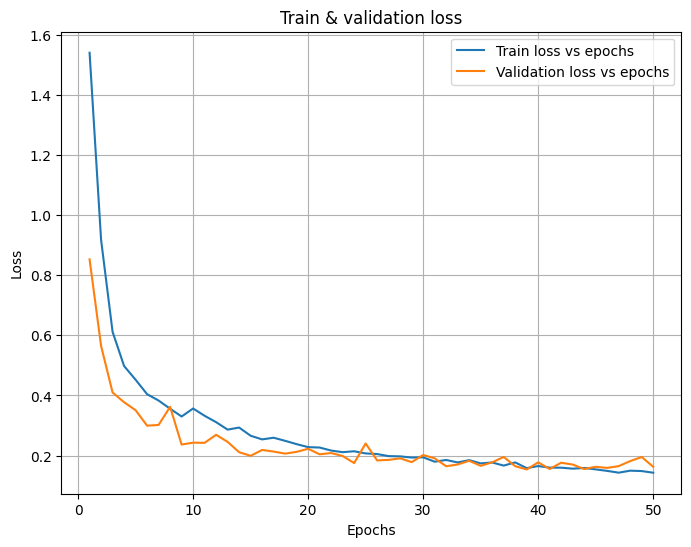

In [79]:
fig,ax=plt.subplots(figsize=(8,6))

cnn1_loss_values = loaded_cnn1_history['loss']
cnn1_val_loss_values = loaded_cnn1_history['val_loss']


epochs = range(1,len(cnn1_loss_values)+1)

ax.plot(epochs,cnn1_loss_values,label='Train loss vs epochs')
ax.plot(epochs,cnn1_val_loss_values,label='Validation loss vs epochs')

ax.set_title('Train & validation loss')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Loss');

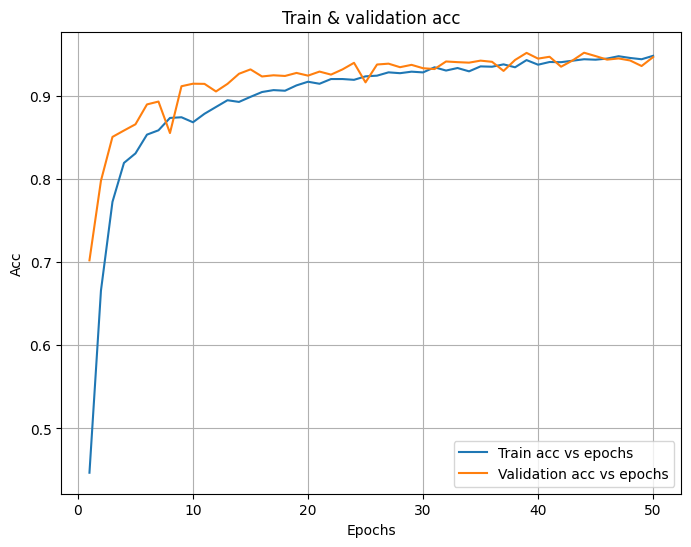

In [80]:
fig,ax=plt.subplots(figsize=(8,6))

cnn1_acc_values = loaded_cnn1_history['accuracy']
cnn1_val_acc_values = loaded_cnn1_history['val_accuracy']


epochs = range(1,len(cnn1_acc_values)+1)

ax.plot(epochs,cnn1_acc_values,label='Train acc vs epochs')
ax.plot(epochs,cnn1_val_acc_values,label='Validation acc vs epochs')

ax.set_title('Train & validation acc')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Acc');

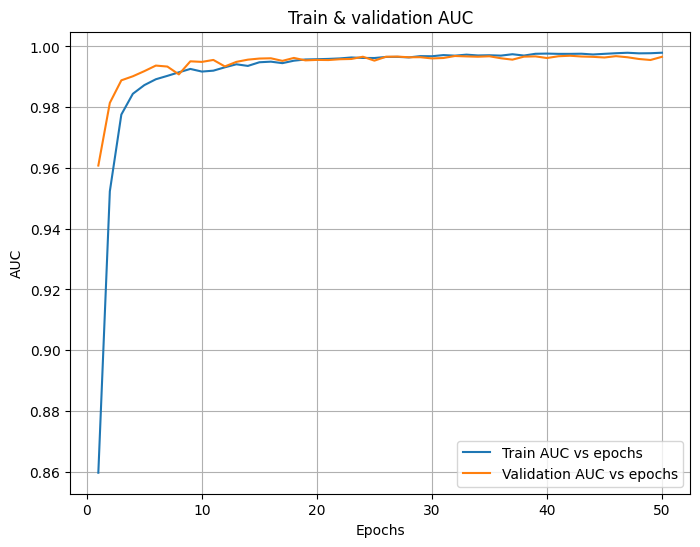

In [81]:
fig,ax=plt.subplots(figsize=(8,6))

cnn1_AUC_values = loaded_cnn1_history['auc']
cnn1_val_AUC_values = loaded_cnn1_history['val_auc']


epochs = range(1,len(cnn1_loss_values)+1)

ax.plot(epochs,cnn1_AUC_values,label='Train AUC vs epochs')
ax.plot(epochs,cnn1_val_AUC_values,label='Validation AUC vs epochs')

ax.set_title('Train & validation AUC')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('AUC');

In [112]:
cnn1_test_class_pred = cnn1_model_loaded.predict(test_generator,steps=len(test_generator))

77/77 [==============================] - 30s 390ms/step


In [218]:
cnn1_predicted_classes = np.argmax(cnn1_test_class_pred, axis=-1)
cnn1_predicted_classes

array([0, 0, 0, ..., 9, 9, 0])

In [219]:
test_true_classes = test_generator.classes
test_true_classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

In [220]:
test_class_labels = list(test_generator.class_indices.keys()) 
test_class_labels

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [221]:
test_class_labels_mapping = {0: 'Tshirts', 1: 'Shirts', 2: 'casual_shoes',3: 'watches' , 4: 'sports_shoes', 5: 'kurtas',6:'handbags',7:'heels',8:'sunglasses',9:'wallets'}
test_class_labels_words = list(test_class_labels_mapping.values())
test_class_labels_words 

['Tshirts',
 'Shirts',
 'casual_shoes',
 'watches',
 'sports_shoes',
 'kurtas',
 'handbags',
 'heels',
 'sunglasses',
 'wallets']

In [222]:
cnn1_cm_digits = confusion_matrix(test_true_classes, cnn1_predicted_classes)
cnn1_cm_digits

array([[1375,   26,    0,    1,    0,   12,    0,    0,    0,    0],
       [   9,  624,    0,    0,    0,    8,    2,    0,    0,    0],
       [   2,    0,  472,    0,   84,    0,    1,   10,    0,    0],
       [   6,    0,    0,  498,    0,    1,    2,    0,    0,    1],
       [   1,    0,   59,    0,  344,    0,    1,    1,    0,    1],
       [   3,    3,    0,    0,    0,  363,    0,    0,    0,    0],
       [   2,    0,    1,    0,    0,    0,  343,    1,    0,    5],
       [   2,    0,    6,    0,    0,    0,    0,  256,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  213,    0],
       [   2,    0,    0,    0,    0,    0,    7,    0,    0,  178]])

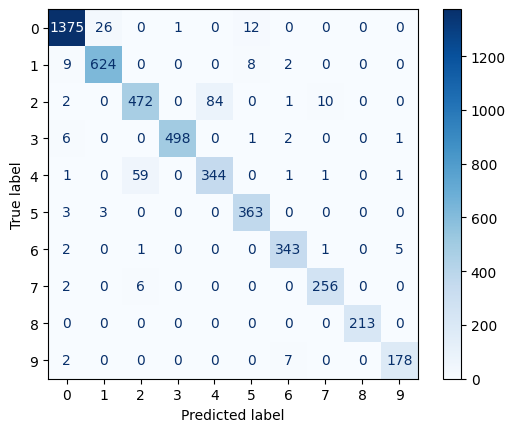

In [223]:
cnn1_disp = ConfusionMatrixDisplay(
    confusion_matrix=cnn1_cm_digits)

cnn1_disp.plot(cmap=plt.cm.Blues)
plt.show()

In [224]:
cnn1_report = classification_report(test_true_classes, cnn1_predicted_classes, target_names=test_class_labels_words,)
print(cnn1_report)

              precision    recall  f1-score   support

     Tshirts       0.98      0.97      0.98      1414
      Shirts       0.96      0.97      0.96       643
casual_shoes       0.88      0.83      0.85       569
     watches       1.00      0.98      0.99       508
sports_shoes       0.80      0.85      0.82       407
      kurtas       0.95      0.98      0.96       369
    handbags       0.96      0.97      0.97       352
       heels       0.96      0.97      0.96       264
  sunglasses       1.00      1.00      1.00       213
     wallets       0.96      0.95      0.96       187

    accuracy                           0.95      4926
   macro avg       0.94      0.95      0.95      4926
weighted avg       0.95      0.95      0.95      4926



In [225]:
cnn1_report_output = classification_report(test_true_classes, cnn1_predicted_classes, target_names=test_class_labels_words,output_dict=True)
print(cnn1_report_output)

{'Tshirts': {'precision': 0.9807417974322397, 'recall': 0.9724186704384724, 'f1-score': 0.9765625, 'support': 1414}, 'Shirts': {'precision': 0.9555895865237366, 'recall': 0.9704510108864697, 'f1-score': 0.962962962962963, 'support': 643}, 'casual_shoes': {'precision': 0.8773234200743495, 'recall': 0.8295254833040422, 'f1-score': 0.8527551942186089, 'support': 569}, 'watches': {'precision': 0.9979959919839679, 'recall': 0.9803149606299213, 'f1-score': 0.9890764647467726, 'support': 508}, 'sports_shoes': {'precision': 0.8037383177570093, 'recall': 0.8452088452088452, 'f1-score': 0.8239520958083831, 'support': 407}, 'kurtas': {'precision': 0.9453125, 'recall': 0.983739837398374, 'f1-score': 0.9641434262948206, 'support': 369}, 'handbags': {'precision': 0.9634831460674157, 'recall': 0.9744318181818182, 'f1-score': 0.9689265536723164, 'support': 352}, 'heels': {'precision': 0.9552238805970149, 'recall': 0.9696969696969697, 'f1-score': 0.9624060150375939, 'support': 264}, 'sunglasses': {'pre

In [227]:
cnn1_f1_scores = {class_name: cnn1_report_output[class_name]['f1-score'] for class_name in test_class_labels_words}
cnn1_f1_scores_rounded = {class_name: round(score, 2) for class_name, score in cnn1_f1_scores.items()}
cnn1_f1_scores_rounded

{'Tshirts': 0.98,
 'Shirts': 0.96,
 'casual_shoes': 0.85,
 'watches': 0.99,
 'sports_shoes': 0.82,
 'kurtas': 0.96,
 'handbags': 0.97,
 'heels': 0.96,
 'sunglasses': 1.0,
 'wallets': 0.96}

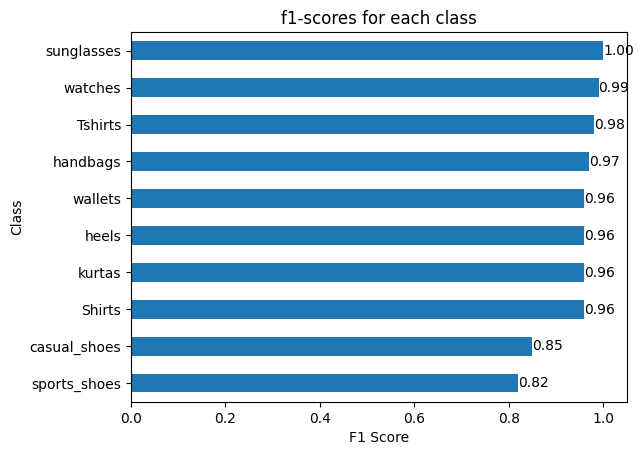

In [228]:
f1_scores_series = pd.Series(cnn1_f1_scores_rounded)

# Sort the Series in descending order by the F1 scores
f1_scores_series_sorted = f1_scores_series.sort_values(ascending=True)

# Plot the horizontal bar chart
ax = f1_scores_series_sorted.plot(kind='barh')
plt.xlabel('F1 Score')
plt.ylabel('Class')
plt.title('f1-scores for each class')

# Display the value of each class in the middle of the bar
for index, value in enumerate(f1_scores_series_sorted):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center')

plt.show()

In [229]:
cnn1_model_precision = cnn1_report_output['weighted avg']['precision']
cnn1_model_precision 

0.9475402557244984

In [230]:
cnn1_model_recall = cnn1_report_output['weighted avg']['recall']
cnn1_model_recall

0.9472188388144539

In [231]:
cnn1_model_f1_score = cnn1_report_output['weighted avg']['f1-score']
cnn1_model_f1_score

0.947203585301183

In [232]:
cnn1_model_accuracy = accuracy_score(test_true_classes, cnn1_predicted_classes)
cnn1_model_accuracy

0.9472188388144539

In [233]:
test_true_classes_onehot = tf.keras.utils.to_categorical(test_true_classes, num_classes=num_classes)

cnn1_model_mean_auc = roc_auc_score(test_true_classes_onehot, cnn1_test_class_pred, multi_class='ovr', average='macro')
cnn1_model_mean_auc

0.9977756950266914

In [234]:
sumary_table.loc[2] = ['2ndmodel + data aug',round(cnn1_model_accuracy,3),round(cnn1_model_mean_auc,3),round(cnn1_model_precision,3),round(cnn1_model_recall,3) ,round(cnn1_model_f1_score,3)] + list(cnn1_f1_scores_rounded.values())
sumary_table

,Model Name,Accuracy_All,AUC_All,Precision_All,Recall_All,F1_score_All,Tshirts,Shirts,casual_shoes,watches,sports_shoes,kurtas,handbags,heels,sunglasses,wallets
0,cnn_baseline_model,0.925,0.994,0.925,0.930,0.930,0.957,0.926,0.825,0.983,0.773,0.956,0.952,0.953,0.995,0.934
1,2nd cnn_model,0.947,0.997,0.947,0.947,0.950,0.979,0.962,0.849,0.990,0.808,0.977,0.966,0.960,0.995,0.960
2,2ndmodel + data aug,0.947,0.998,0.948,0.947,0.947,0.980,0.960,0.850,0.990,0.820,0.960,0.970,0.960,1.000,0.960



Regarding the training metrics, there is a continuous improvement in terms of loss, accuracy, AUC, precision, and recall. The accuracy increases from approximately 44.68% to 94.85%, and the AUC increases from around 0.8597 to 0.9979. These results suggest that the model is progressively learning to better fit the training data.

For the validation set, similar improvement is observed with the accuracy increasing from about 70.23% to 94.69%, and the AUC increasing from approximately 0.9608 to 0.9966. This indicates that the model is successfully generalizing to previously unseen data.

Both the training loss and validation loss decrease steadily throughout the training process, as expected during model convergence. The training loss reduces from 1.5403 to 0.1428, and the validation loss decreases from 0.8527 to 0.1625. This decline in loss signifies that the model is getting closer to minimizing the discrepancy between predicted and actual values.

Moreover, the training accuracy and validation accuracy closely align starting from the 30th epoch, both reaching 95% accuracy at the 50th epoch. Similarly, the training and validation loss remain closely aligned after the 30th epoch without increasing.

Additionally, the AUC for both the training and validation sets shows an initial increase and then plateaus at nearly 100%, indicating that the model's performance is stable.

Finally, the test accuracy is approximately 95%, with an AUC of 0.998 and a loss of 0.149. These results demonstrate that the model performs well and can generalize effectively on unseen data.

### Conclusion

After conducting training on three differnt models, it has become evident that the CNN model with 11 layers, along with data augmentation, outperforms the others. This model demonstrates strong generalization capabilities, achieving an impressive test accuracy of 95% and almost perfect test AUC of nearly 100%.

However, it is important to note that the f1-score for casual shoes and sports shoes can reach a maximum of 85% and 82%, respectively. This limitation arises due to the challenges of differentiating between these two categories, which can be visualy similar and pose complexities for machines learning algorithms.

Given the models' exceptional performance and effective generalization on unseen data, there is no neeed to employ additional regularization techniques such as Dropout, L2, L1, or others, as overfitting is already well mitigated.

Best model CNN:

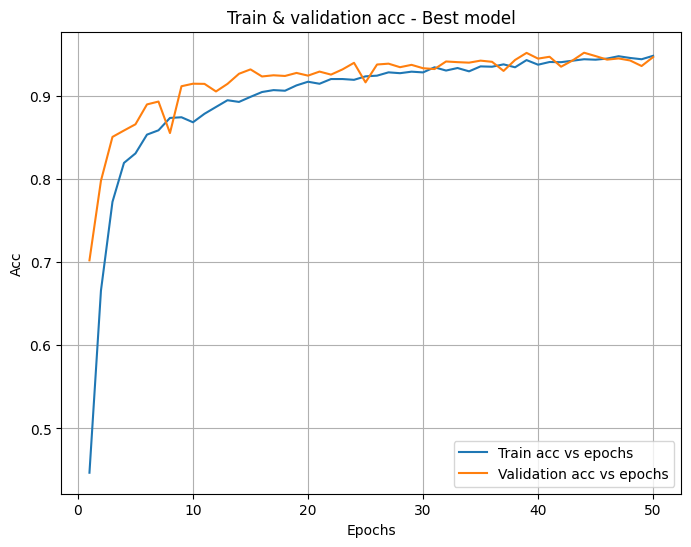

In [236]:
fig,ax=plt.subplots(figsize=(8,6))

cnn1_acc_values = loaded_cnn1_history['accuracy']
cnn1_val_acc_values = loaded_cnn1_history['val_accuracy']


epochs = range(1,len(cnn1_acc_values)+1)

ax.plot(epochs,cnn1_acc_values,label='Train acc vs epochs')
ax.plot(epochs,cnn1_val_acc_values,label='Validation acc vs epochs')

ax.set_title('Train & validation acc - Best model')
ax.legend()
ax.set_xlabel('Epochs')
plt.grid()
ax.set_ylabel('Acc');

In [250]:
best_cnn_f1score_table = sumary_table.iloc[[2]]
best_cnn_f1score_table

,Model Name,Accuracy_All,AUC_All,Precision_All,Recall_All,F1_score_All,Tshirts,Shirts,casual_shoes,watches,sports_shoes,kurtas,handbags,heels,sunglasses,wallets
2,2ndmodel + data aug,0.947,0.998,0.948,0.947,0.947,0.98,0.96,0.85,0.99,0.82,0.96,0.97,0.96,1.0,0.96


In [251]:
best_cnn_f1score_table.to_csv('best_cnn_f1score_table.csv')

In [253]:
base_and_best_cnn_f1score_table = sumary_table.iloc[[0,2]]
base_and_best_cnn_f1score_table

,Model Name,Accuracy_All,AUC_All,Precision_All,Recall_All,F1_score_All,Tshirts,Shirts,casual_shoes,watches,sports_shoes,kurtas,handbags,heels,sunglasses,wallets
0,cnn_baseline_model,0.925,0.994,0.925,0.930,0.930,0.957,0.926,0.825,0.983,0.773,0.956,0.952,0.953,0.995,0.934
2,2ndmodel + data aug,0.947,0.998,0.948,0.947,0.947,0.980,0.960,0.850,0.990,0.820,0.960,0.970,0.960,1.000,0.960


In [254]:
base_and_best_cnn_f1score_table.to_csv('base_and_best_cnn_f1score_table.csv')